## Baseline checks

Just checking everything works as it should

In [108]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

### Visualize dataset

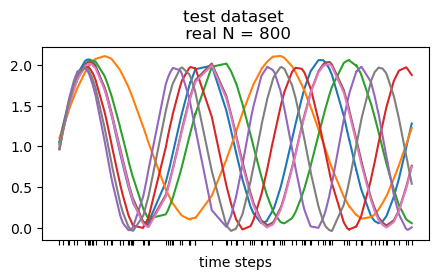

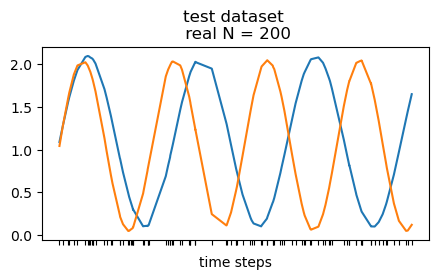

In [109]:

# read in the periodic dataset file 
test_dataset_filename = "../data/periodic/periodic_test.pt"
train_dataset_filename = "../data/periodic/periodic_train.pt"
time_steps_filename = "../data/periodic/periodic_time_steps.pt"
# read in the time steps
time_steps = torch.load(time_steps_filename, weights_only=True)
# read in the pt file
test_dataset = torch.load(test_dataset_filename, weights_only=True)
train_dataset = torch.load(train_dataset_filename,  weights_only=True)

# extract the first 2 from the test dataset
# get total number of time steps
n_samples = train_dataset.shape[0]
n_plot = 8
train_dataset_plot = train_dataset[0:n_plot]
train_dataset_plot.shape
# plot time steps on x and the test dataset on y
plt.figure(figsize=(5, 2.5))
for i in range(n_plot):
    plt.plot(time_steps, train_dataset_plot[i], label='Training Dataset {}'.format(i))
# draw a grey vertical line at each time step
# for t in time_steps:
#     plt.axvline(x=t, color='gray', linewidth=0.3)
#     # draw x tick marks at each time step inside the plot
plt.xticks(time_steps, rotation=45)
# remove labels on x axis
plt.xticks(ticks=time_steps, labels=['']*len(time_steps))


# draw tick marks on x axis only where there is a time step
plt.xlabel('time steps')
plt.title('test dataset \n real N = {}'.format(n_samples))
# put the legend outside the plot
plt.show()

# extract the first 2 from the test dataset
n_plot = 2
test_dataset_plot = test_dataset[0:n_plot]
test_dataset_plot.shape
n_samples = test_dataset.shape[0]
# plot time steps on x and the test dataset on y
plt.figure(figsize=(5, 2.5))
for i in range(n_plot):
    plt.plot(time_steps, test_dataset_plot[i], label='Test Dataset {}'.format(i))
# draw a grey vertical line at each time step
# for t in time_steps:
#     plt.axvline(x=t, color='gray', linewidth=0.3)
#     # draw x tick marks at each time step inside the plot
plt.xticks(time_steps, rotation=45)
# remove labels on x axis
plt.xticks(ticks=time_steps, labels=['']*len(time_steps))
plt.xlabel('time steps')
plt.title('test dataset \n real N = {}'.format(n_samples))
# put the legend outside the plot
plt.show()


### Check centralized training

In [110]:
centralized_training_loss = "../results/periodic/centralized_training/20_epochs/loss_per_epoch.csv"

In [111]:
df_centralized_training_loss

,epoch,loss,mse
0,0,2419.936035,0.491164
1,1,2362.902832,0.472940
2,2,2350.394287,0.470682
3,3,2379.681641,0.476761
4,4,2195.118408,0.439088
5,5,2312.707764,0.462928
6,6,2254.081299,0.451221
7,7,2194.347900,0.439327
8,8,2097.234619,0.419846
9,9,2095.136963,0.419853


Text(0.5, 1.0, 'Centralized Training MSE')

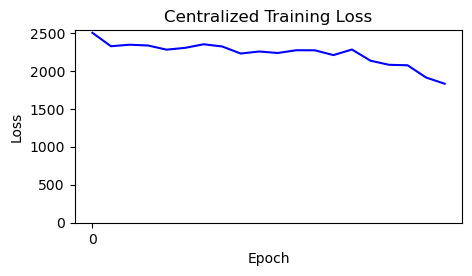

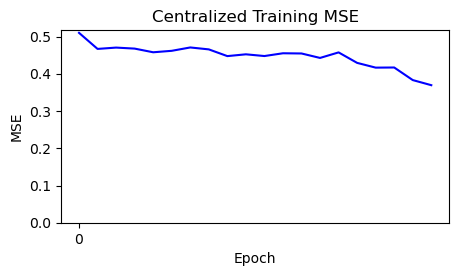

In [112]:
# read in the csv file
df_centralized_training_loss = pd.read_csv(centralized_training_loss)
#plot the training loss
plt.figure(figsize=(5, 2.5))
plt.plot(df_centralized_training_loss['epoch'], df_centralized_training_loss['loss'], label='Centralized Training Loss', color='blue')
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df_centralized_training_loss['epoch'])
# plot only every 50th epoch
max_epoch = df_centralized_training_loss['epoch'].max()
plt.xticks(np.arange(0, max_epoch, 25))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Centralized Training Loss')


plt.figure(figsize=(5, 2.5))
plt.plot(df_centralized_training_loss['epoch'], df_centralized_training_loss['mse'], label='Centralized Training Loss', color='blue')
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df_centralized_training_loss['epoch'])
plt.xticks(np.arange(0, max_epoch, 25))
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Centralized Training MSE')





## Plot client side

In [121]:
cn = 0

def plot_client_loss(cn):

    # Load JSON file
    with open(f"../results/periodic/federated_training/20_epochs/federated_outputs/results_{cn}.json", "r") as f:
        data = json.load(f)


    # Extract loss values, rounds, and epochs
    loss_values = []
    rounds = []
    epochs = []

    epoch_count = 0  # To keep track of epochs

    for entry in data["client_train"]:
        round_number = entry["round"]
        for loss in entry["loss"]:
            rounds.append(round_number)
            loss_values.append(loss)
            epochs.append(epoch_count)
            epoch_count += 1

    # make it smaller 
    plt.figure(figsize=(10, 2.5))
    # Plot loss values sequentially across rounds and epochs
    plt.plot(epochs, loss_values, marker='o', label="Loss across epochs")


    # Add vertical lines for each round number
    for round_number in set(rounds):
        round_epochs = [i for i, r in enumerate(rounds) if r == round_number]
        if round_epochs:
            # Place a vertical line at the first epoch of each round
            # if it is not the first round
            if round_number != 0:
                plt.axvline(x=round_epochs[0], color='grey', linestyle='--', label=f"Round {round_number}")

    # Customize x-axis ticks to represent rounds
    xticks = [i for i, round_number in enumerate(rounds) if i == 0 or rounds[i] != rounds[i-1]]
    plt.xticks(xticks, [rounds[i] for i in xticks])
    # log scale y 
    plt.yscale('log')
    plt.ylim(bottom=0)
    plt.xlabel("Round")
    plt.ylabel("Local Loss")
    plt.title(f"Client {cn}")
    plt.tight_layout()
    plt.show()

In [122]:
with open(f"../results/periodic/federated_training/20_epochs/federated_outputs/results_{cn}.json", "r") as f:
    data = json.load(f)

data

{'client_train': [{'loss': [32494.98046875, 21590.21484375, 20205.978515625],
   'round': 0},
  {'loss': [16811.560546875, 19935.015625, 12687.556640625], 'round': 1},
  {'loss': [30985.08984375, 7137.3681640625, 8057.79150390625], 'round': 2},
  {'loss': [18153.419921875, 9759.4140625, 8585.388671875], 'round': 3},
  {'loss': [13179.900390625, 14901.837890625, 5907.2451171875], 'round': 4},
  {'loss': [10026.0927734375, 25517.224609375, 17135.2109375], 'round': 5},
  {'loss': [29246.34765625, 12228.5693359375, 8819.1005859375], 'round': 6},
  {'loss': [38927.91796875, 17100.259765625, 19055.525390625], 'round': 7},
  {'loss': [11895.9091796875, 7890.56494140625, 9146.947265625], 'round': 8},
  {'loss': [7467.146484375, 4481.35009765625, 6932.10302734375], 'round': 9},
  {'loss': [11440.25, 8079.962890625, 5879.04541015625], 'round': 10},
  {'loss': [2994.1494140625, 3125.30712890625, 3892.493408203125],
   'round': 11},
  {'loss': [5052.70361328125, 3343.5048828125, 3104.777099609375]

/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_69187/2608171154.py:45: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


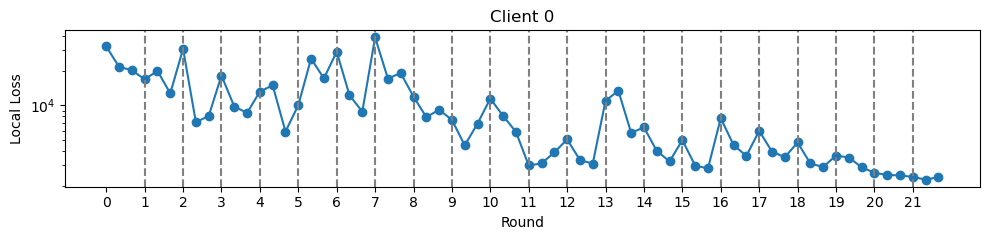

/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_69187/2608171154.py:45: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


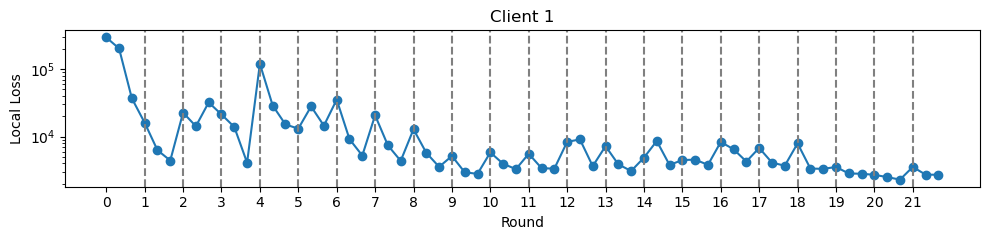

In [123]:
plot_client_loss(0)
plot_client_loss(1)

In [116]:
df_centralized_evaluate

,round,centralized_loss,centralized_accuracy
0,0,1236.469448,0.249886
1,1,1781.654994,0.549274
2,2,1653.965123,0.394479
3,3,1687.429827,0.390291
4,4,3545.100446,0.719041
5,5,642.235770,0.160168
6,6,5894.621094,1.628307
7,7,663.577567,0.139028
8,8,989.616839,0.199875
9,9,1086.675642,0.254639


([<matplotlib.axis.XTick at 0x11ee7e900>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25')])

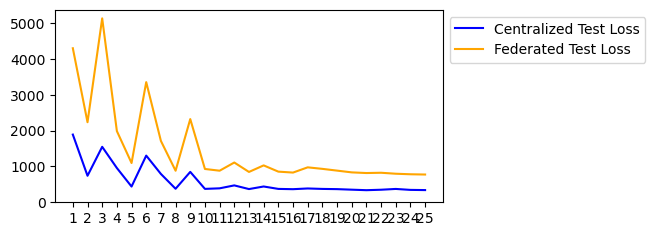

In [124]:
# Now load the federated learning loss
federated_training_loss = "../results/periodic/federated_training/20_epochs/federated_outputs/results.json"
with open(federated_training_loss, 'r') as f:
    data = json.load(f)

# Plot centralized evaluate
df_centralized_evaluate = pd.DataFrame(data['centralized_evaluate'])
df_federated_evaluate = pd.DataFrame(data['federated_evaluate'])

# Join the two dataframes on the round
df_centralized_evaluate['round'] = df_centralized_evaluate['round'].astype(int)
df_federated_evaluate['round'] = df_federated_evaluate['round'].astype(int)

# join the two dataframes on the round
df = pd.merge(df_centralized_evaluate, df_federated_evaluate, on='round')
# now plot the data
plt.figure(figsize=(5, 2.5))
plt.plot(df['round'], df['centralized_loss'], label='Centralized Test Loss', color='blue')
plt.plot(df['round'], df['federated_evaluate_loss'], label='Federated Test Loss', color='orange')
# log scale

# add legend on the outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df['round'])

In [118]:
df

,round,centralized_loss,centralized_accuracy,federated_evaluate_loss,federated_evaluate_accuracy
0,1,1891.813058,0.413855,4304.556803,0.905931
1,2,741.009556,0.210208,2237.467285,0.518563
2,3,1549.863002,0.390320,5139.510579,1.076846
3,4,957.644601,0.228788,1990.009521,0.456692
4,5,439.799247,0.093321,1097.265747,0.224528
5,6,1304.026367,0.366653,3357.874186,0.815039
6,7,791.738142,0.183026,1714.857340,0.373786
7,8,377.820103,0.077853,881.539388,0.181491
8,9,849.316127,0.211217,2324.913005,0.592389
9,10,374.260254,0.093026,930.660807,0.199329


In [119]:
df

,round,centralized_loss,centralized_accuracy,federated_evaluate_loss,federated_evaluate_accuracy
0,1,1891.813058,0.413855,4304.556803,0.905931
1,2,741.009556,0.210208,2237.467285,0.518563
2,3,1549.863002,0.390320,5139.510579,1.076846
3,4,957.644601,0.228788,1990.009521,0.456692
4,5,439.799247,0.093321,1097.265747,0.224528
5,6,1304.026367,0.366653,3357.874186,0.815039
6,7,791.738142,0.183026,1714.857340,0.373786
7,8,377.820103,0.077853,881.539388,0.181491
8,9,849.316127,0.211217,2324.913005,0.592389
9,10,374.260254,0.093026,930.660807,0.199329


Text(0.5, 1.0, 'Test MSE')

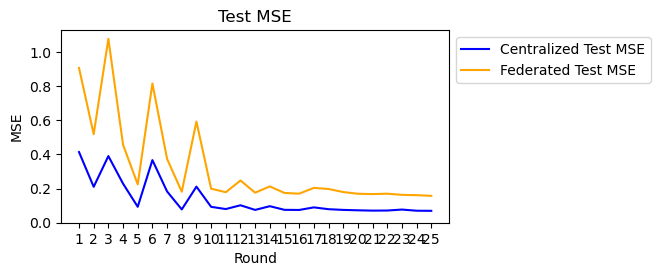

In [120]:
# same as above with mse
plt.figure(figsize=(5, 2.5))
plt.plot(df['round'], df['centralized_accuracy'], label='Centralized Test MSE', color='blue')
plt.plot(df['round'], df['federated_evaluate_accuracy'], label='Federated Test MSE', color='orange')
# add legend on the outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df['round'])
# add x and y labels
plt.xlabel('Round')
plt.ylabel('MSE')
plt.title('Test MSE')